<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q3_3part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from matplotlib import pyplot as plt

In [3]:
mnist=keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
batch=[32,1000]     
x=np.arange(0,3,0.2)
n_batch=np.zeros([len(x)])
for i in range(len(x)):
  n_batch[i]=batch[0]*(1-x[i])+x[i]*batch[1]
n_batch.astype(int)
#plt.plot(alpha,n_batch)


array([  32,  225,  419,  612,  806, 1000, 1193, 1387, 1580, 1774, 1968,
       2161, 2355, 2548, 2742])

array([  32. ,  225.6,  419.2,  612.8,  806.4, 1000. , 1193.6, 1387.2,
       1580.8, 1774.4, 1968. , 2161.6, 2355.2, 2548.8, 2742.4])

In [5]:
acc=[]
v_acc=[]
loss=[]
v_loss=[]
for i in range(len(x)):

  # Sequential Model
  model=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(64,activation=tf.nn.relu),
     keras.layers.Dense(64,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
  )
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history= model.fit(train_images, train_labels, validation_split=0.3,batch_size=n_batch[i].astype(int), epochs=2)
  acc.append(history.history['accuracy'][-1])
  loss.append(history.history['loss'][-1])
  v_acc.append(history.history['val_accuracy'][-1])
  v_loss.append(history.history['val_loss'][-1])

Epoch 1/2
1313/1313 [==============================] - 4s 2ms/step - loss: 0.6757 - accuracy: 0.8052 - val_loss: 0.2254 - val_accuracy: 0.9339
Epoch 2/2
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1736 - accuracy: 0.9482 - val_loss: 0.1694 - val_accuracy: 0.9481
Epoch 1/2
187/187 [==============================] - 1s 5ms/step - loss: 1.1982 - accuracy: 0.6827 - val_loss: 0.3156 - val_accuracy: 0.9073
Epoch 2/2
187/187 [==============================] - 1s 4ms/step - loss: 0.2850 - accuracy: 0.9194 - val_loss: 0.2433 - val_accuracy: 0.9296
Epoch 1/2
101/101 [==============================] - 1s 7ms/step - loss: 1.5044 - accuracy: 0.6193 - val_loss: 0.3615 - val_accuracy: 0.8964
Epoch 2/2
101/101 [==============================] - 1s 6ms/step - loss: 0.3346 - accuracy: 0.9046 - val_loss: 0.2816 - val_accuracy: 0.9181
Epoch 1/2
69/69 [==============================] - 1s 10ms/step - loss: 1.6793 - accuracy: 0.5422 - val_loss: 0.4572 - val_accuracy: 0.8723
Epoch 2/2


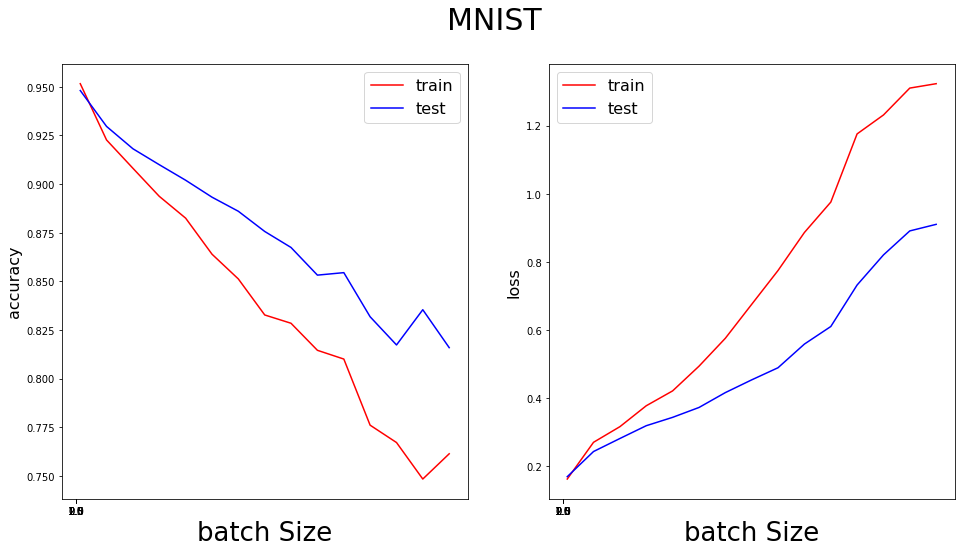

In [13]:
#plotting the loss and the accuracy
f = plt.figure(figsize=(16,8))
plt.suptitle("MNIST",fontsize=30)
ax1 = f.add_subplot(1,2,1)
ax1.plot(n_batch.astype(int),acc,'r-', label='train')
ax1.plot(n_batch.astype(int),v_acc,'b-', label='test')
ax1.legend(loc='upper right',fontsize=16)
ax1.set_xlabel('batch Size',fontsize=26)
ax1.set_ylabel("accuracy",fontsize=16)
xticks=ax1.set_xticks(np.arange(0,3,0.5))
#losses
ax2 = f.add_subplot(1,2,2)
ax2.plot(n_batch.astype(int),loss,'r-',label='train')
ax2.plot(n_batch.astype(int),v_loss,'b-',label='test')
ax2.legend(loc='upper left',fontsize=16)
ax2.set_xlabel('batch Size',fontsize=26)
ax2.set_ylabel("loss",fontsize=16)
xticks=ax2.set_xticks(np.arange(0,3,0.5))

# **Sensitivity**

In [ ]:
model=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
)

[[0.19152565]] [[0.06277262]]
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.]], dtype=float32)>


In [ ]:
func_to_calculate_jacobian(model, train_object)